In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.cm as cm

1K_C12_HBSS_24h_LT_01_masks.tif: unique values in mask -> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


C:\Users\sj1205\AppData\Local\Temp\ipykernel_7968\1366540011.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', 28)  # tab20 gives 20 colors; you can use more with 'nipy_spectral' or 'gist_ncar'


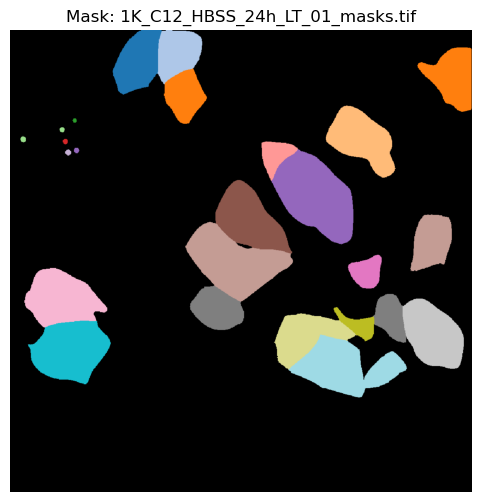

1K_C12_HBSS_24h_LT_02_masks.tif: unique values in mask -> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


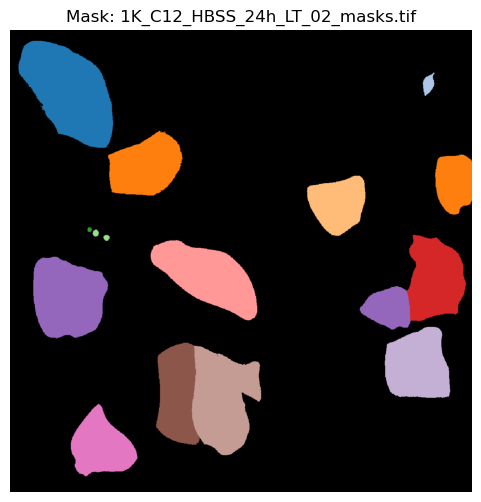

In [7]:
# Path to the folder
folder_path = "../images/masks"

# Get all image files
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]

# Choose a colormap with many distinguishable colors
colormap = cm.get_cmap('tab20', 28)  # tab20 gives 20 colors; you can use more with 'nipy_spectral' or 'gist_ncar'

for filename in image_files:
    image_path = os.path.join(folder_path, filename)

    # Load mask as grayscale
    mask = np.array(Image.open(image_path).convert("L"))
    print(f"{filename}: unique values in mask -> {np.unique(mask)}")

    # Create color-coded mask using the colormap
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    unique_vals = np.unique(mask)

    for val in unique_vals:
        if val == 0:
            continue  # Skip background if you want
        color = (np.array(colormap(val)[:3]) * 255).astype(np.uint8)
        color_mask[mask == val] = color

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(color_mask)
    plt.title(f"Mask: {filename}")
    plt.axis("off")
    plt.show()